In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [8]:
f = open('./hw3dataset/graph_1.txt','r')
input = []
for line in f.readlines():
    s = line.split('\n')[0]
    s = s.split(',')
    s = tuple(s)
    input.append(s)
f.close

<function TextIOWrapper.close()>

In [9]:
G = nx.DiGraph()
G.add_edges_from(input)
print("節點個數: ",G.number_of_nodes())
print("邊的個數: ",G.number_of_edges())

節點個數:  6
邊的個數:  5


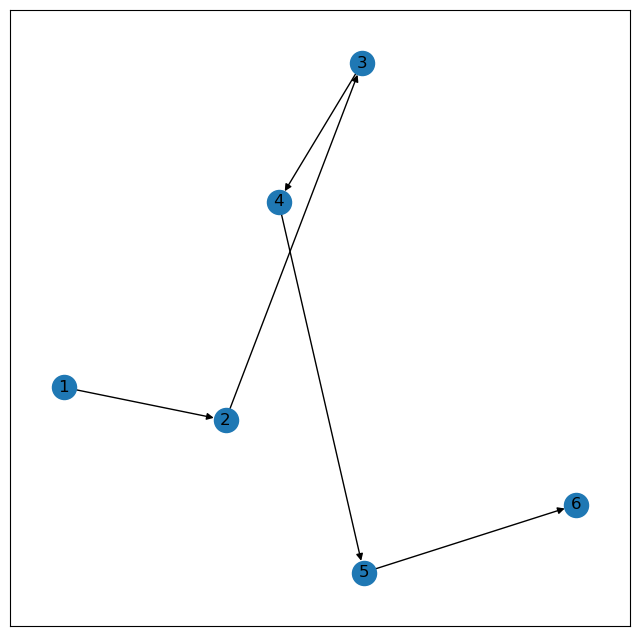

In [10]:
plt.figure(figsize =(8, 8))
nx.draw_networkx(G, with_labels = True)
plt.show()

In [11]:
def PageRank(graph, iter, damping):
    n = graph.number_of_nodes()
    d_frac = damping / n
    rank = dict.fromkeys(graph, 1.0 / n) # 每個節點賦值
    for _ in range(iter):
        lastRank = rank
        for node in rank: # 全部的點跑一次
            #print("node:",node)
            rankSum = 0
            for predecessors in graph.predecessors(node): #找父親
                #print("父親是:",predecessors)
                outdegree = graph.out_degree(predecessors)
                if outdegree > 0:
                    rankSum += lastRank[predecessors] * (1.0 / outdegree)
            rank[node] = d_frac + ((1 - damping) * rankSum)
            #print("點",node,":",rank[node])
        #print("rank:",rank)
        #print("----迭代完成----")
    return rank   

In [12]:
iter = 30
damping_factor = 0.1
pagerank = PageRank(G, iter, damping_factor)

In [13]:
file = open("./graph_1_pagerank.txt","wb")
ans = []
for key,value in pagerank.items():
    ans.append(value)
ans = np.array(ans)
print(type(ans))
np.savetxt(file, ans,newline = ' ',fmt='%.03f')
file.close()

<class 'numpy.ndarray'>
